In [25]:
import numpy as np
import pandas as pd
from itertools import chain
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [26]:
df=pd.read_csv("heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [27]:
   
from sklearn.impute import SimpleImputer
from ydata_profiling import ProfileReport
from pydantic_settings import BaseSettings

import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import plot_importance

In [28]:
profile = ProfileReport(df, title='Pandas Profiling Report', explorative=True)

In [29]:
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [30]:
profile.to_file("EDA_heart_Disease.html")

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

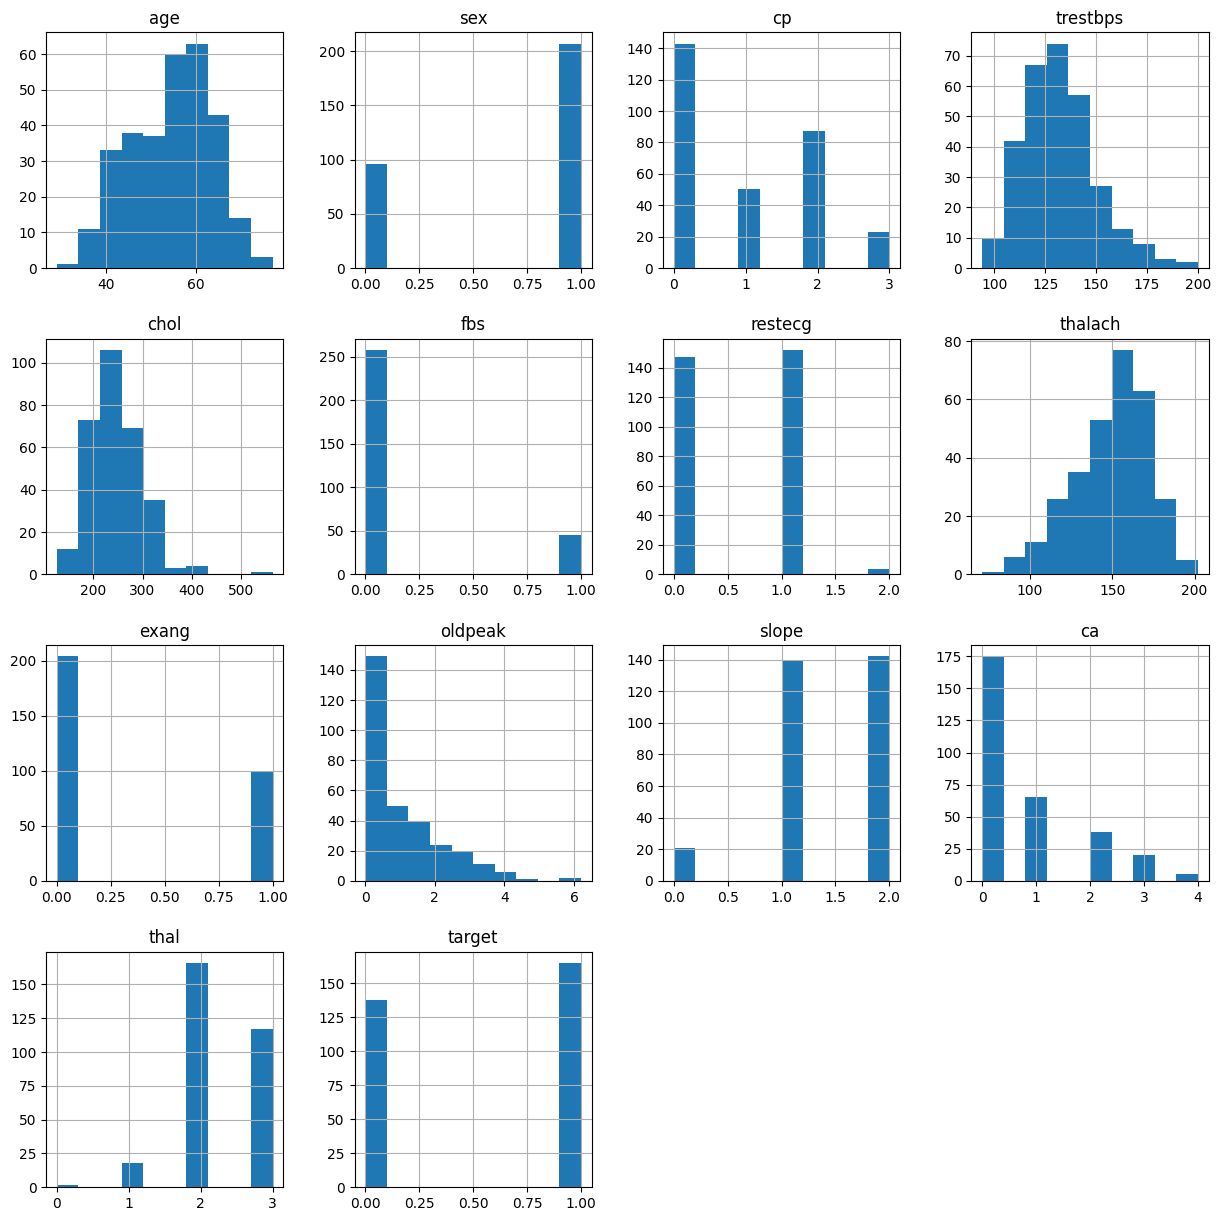

In [31]:

fig = plt.figure(figsize = (15,15))
ax = fig.gca()
g = df.hist(ax=ax)

In [32]:

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [33]:
scal=MinMaxScaler()
feat=['age', 'sex', 'cp', 'trestbps', 'chol','fbs','restecg','thalach' ,'exang', 'oldpeak' ,'slope', 'ca', 'thal']
df[feat] = scal.fit_transform(df[feat])
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.708333,1.0,1.000000,0.481132,0.244292,1.0,0.0,0.603053,0.0,0.370968,0.0,0.0,0.333333,1
1,0.166667,1.0,0.666667,0.339623,0.283105,0.0,0.5,0.885496,0.0,0.564516,0.0,0.0,0.666667,1
2,0.250000,0.0,0.333333,0.339623,0.178082,0.0,0.0,0.770992,0.0,0.225806,1.0,0.0,0.666667,1
3,0.562500,1.0,0.333333,0.245283,0.251142,0.0,0.5,0.816794,0.0,0.129032,1.0,0.0,0.666667,1
4,0.583333,0.0,0.000000,0.245283,0.520548,0.0,0.5,0.702290,1.0,0.096774,1.0,0.0,0.666667,1


In [34]:
X=df.drop("target",axis=1).values
Y=df.target.values
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=0,test_size=0.2)

In [35]:

from sklearn.metrics import accuracy_score,recall_score,f1_score,precision_score,roc_auc_score,confusion_matrix,classification_report
from sklearn.metrics import r2_score,mean_squared_error,accuracy_score,recall_score,precision_score,confusion_matrix,classification_report
from scikitplot.metrics import plot_confusion_matrix,plot_roc

In [36]:
x_test=X_test
y_test=Y_test
def evaluation(model,model_name):
    y_pred=model.predict(x_test)
    conf_matrix =confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test,y_pred)
    rcl = recall_score(y_test,y_pred)
    f1 = f1_score(y_test,y_pred)
    class_report = classification_report(y_test,y_pred)
    tempre =[ model_name,accuracy,rcl,f1]
    metric_dict={'accuracy Score': round(accuracy,3),
               'recall Score': round(rcl,3),
               'F1 score': round(f1,3),
              }
    return (print("<--------------Evaluation Report of "+ model_name +" Model ------------------->\n"),
            print("Confusion matrix of "+model_name+" Model is :\n"),
            print(conf_matrix),
            print("\n"),
            print("Accuracy of the "+model_name+" Model is : ",accuracy),
            print("\n"),
            print("Classification Report of "+model_name+" Model is :\n"),
            print(class_report),
            print(metric_dict),
            tempre
           )


In [37]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
result = pd.DataFrame(columns=['Model', 'Accuracy Score', 'Recall Score', 'F1 Score'])
lr = LogisticRegression()
model = lr.fit(X_train, Y_train)
m = evaluation(lr, "Logistic Regression")
res = list(chain.from_iterable(list(filter(None, m))))
result.loc[len(result)] = res
result


<--------------Evaluation Report of Logistic Regression Model ------------------->

Confusion matrix of Logistic Regression Model is :

[[20  7]
 [ 3 31]]


Accuracy of the Logistic Regression Model is :  0.8360655737704918


Classification Report of Logistic Regression Model is :

              precision    recall  f1-score   support

           0       0.87      0.74      0.80        27
           1       0.82      0.91      0.86        34

    accuracy                           0.84        61
   macro avg       0.84      0.83      0.83        61
weighted avg       0.84      0.84      0.83        61

{'accuracy Score': 0.836, 'recall Score': 0.912, 'F1 score': 0.861}


,Model,Accuracy Score,Recall Score,F1 Score
0,Logistic Regression,0.836066,0.911765,0.861111


In [38]:
import pandas as pd
from sklearn.naive_bayes import GaussianNB
result = pd.DataFrame(columns=['Model', 'Accuracy Score', 'Recall Score', 'F1 Score'])
nb = GaussianNB()
nb.fit(X_train, Y_train)
m = evaluation(nb, "Naive Bayes")
res = list(chain.from_iterable(list(filter(None, m))))
result.loc[len(result)] = res
result




<--------------Evaluation Report of Naive Bayes Model ------------------->

Confusion matrix of Naive Bayes Model is :

[[21  6]
 [ 3 31]]


Accuracy of the Naive Bayes Model is :  0.8524590163934426


Classification Report of Naive Bayes Model is :

              precision    recall  f1-score   support

           0       0.88      0.78      0.82        27
           1       0.84      0.91      0.87        34

    accuracy                           0.85        61
   macro avg       0.86      0.84      0.85        61
weighted avg       0.85      0.85      0.85        61

{'accuracy Score': 0.852, 'recall Score': 0.912, 'F1 score': 0.873}


,Model,Accuracy Score,Recall Score,F1 Score
0,Naive Bayes,0.852459,0.911765,0.873239


In [39]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
result = pd.DataFrame(columns=['Model', 'Accuracy Score', 'Recall Score', 'F1 Score'])
lr = LogisticRegression()
model = lr.fit(X_train, Y_train)
m = evaluation(lr, "Logistic Regression")
res = list(chain.from_iterable(list(filter(None, m))))
result.loc[len(result)] = res
nb = GaussianNB()
nb.fit(X_train, Y_train)
m = evaluation(nb, "Naive Bayes")
res = list(chain.from_iterable(list(filter(None, m))))
result.loc[len(result)] = res
result


<--------------Evaluation Report of Logistic Regression Model ------------------->

Confusion matrix of Logistic Regression Model is :

[[20  7]
 [ 3 31]]


Accuracy of the Logistic Regression Model is :  0.8360655737704918


Classification Report of Logistic Regression Model is :

              precision    recall  f1-score   support

           0       0.87      0.74      0.80        27
           1       0.82      0.91      0.86        34

    accuracy                           0.84        61
   macro avg       0.84      0.83      0.83        61
weighted avg       0.84      0.84      0.83        61

{'accuracy Score': 0.836, 'recall Score': 0.912, 'F1 score': 0.861}
<--------------Evaluation Report of Naive Bayes Model ------------------->

Confusion matrix of Naive Bayes Model is :

[[21  6]
 [ 3 31]]


Accuracy of the Naive Bayes Model is :  0.8524590163934426


Classification Report of Naive Bayes Model is :

              precision    recall  f1-score   support

           0    

,Model,Accuracy Score,Recall Score,F1 Score
0,Logistic Regression,0.836066,0.911765,0.861111
1,Naive Bayes,0.852459,0.911765,0.873239


In [40]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
result = pd.DataFrame(columns=['Model', 'Accuracy Score', 'Recall Score', 'F1 Score'])
lr = LogisticRegression()
model = lr.fit(X_train, Y_train)
m = evaluation(lr, "Logistic Regression")
res = list(chain.from_iterable(list(filter(None, m))))
result.loc[len(result)] = res
nb = GaussianNB()
nb.fit(X_train, Y_train)
m = evaluation(nb, "Naive Bayes")
res = list(chain.from_iterable(list(filter(None, m))))
result.loc[len(result)] = res
dt = DecisionTreeClassifier(criterion='entropy', random_state=0, max_depth=6)
dt.fit(X_train, Y_train)
p = evaluation(dt, "Decision Tree")
res = list(chain.from_iterable(list(filter(None, p))))
result.loc[len(result)] = res
result


<--------------Evaluation Report of Logistic Regression Model ------------------->

Confusion matrix of Logistic Regression Model is :

[[20  7]
 [ 3 31]]


Accuracy of the Logistic Regression Model is :  0.8360655737704918


Classification Report of Logistic Regression Model is :

              precision    recall  f1-score   support

           0       0.87      0.74      0.80        27
           1       0.82      0.91      0.86        34

    accuracy                           0.84        61
   macro avg       0.84      0.83      0.83        61
weighted avg       0.84      0.84      0.83        61

{'accuracy Score': 0.836, 'recall Score': 0.912, 'F1 score': 0.861}
<--------------Evaluation Report of Naive Bayes Model ------------------->

Confusion matrix of Naive Bayes Model is :

[[21  6]
 [ 3 31]]


Accuracy of the Naive Bayes Model is :  0.8524590163934426


Classification Report of Naive Bayes Model is :

              precision    recall  f1-score   support

           0    

,Model,Accuracy Score,Recall Score,F1 Score
0,Logistic Regression,0.836066,0.911765,0.861111
1,Naive Bayes,0.852459,0.911765,0.873239
2,Decision Tree,0.819672,0.794118,0.830769


In [41]:
from sklearn.svm import SVC
SVC_clf = SVC(kernel='rbf', C=2)
SVC_clf.fit(X_train, Y_train)
p = evaluation(SVC_clf, "Support Vector Machine")
res = list(chain.from_iterable(list(filter(None, p))))
result.loc[3] = res
result


<--------------Evaluation Report of Support Vector Machine Model ------------------->

Confusion matrix of Support Vector Machine Model is :

[[22  5]
 [ 2 32]]


Accuracy of the Support Vector Machine Model is :  0.8852459016393442


Classification Report of Support Vector Machine Model is :

              precision    recall  f1-score   support

           0       0.92      0.81      0.86        27
           1       0.86      0.94      0.90        34

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.88        61

{'accuracy Score': 0.885, 'recall Score': 0.941, 'F1 score': 0.901}


,Model,Accuracy Score,Recall Score,F1 Score
0,Logistic Regression,0.836066,0.911765,0.861111
1,Naive Bayes,0.852459,0.911765,0.873239
2,Decision Tree,0.819672,0.794118,0.830769
3,Support Vector Machine,0.885246,0.941176,0.901408


In [42]:
from sklearn.ensemble import RandomForestClassifier
RF_clf = RandomForestClassifier(n_estimators=30, max_depth=3, random_state=3)
RF_clf.fit(X_train, Y_train)
p = evaluation(RF_clf, "Random Forest Classifier")
res = list(chain.from_iterable(list(filter(None, p))))
result.loc[4] = res
result


<--------------Evaluation Report of Random Forest Classifier Model ------------------->

Confusion matrix of Random Forest Classifier Model is :

[[22  5]
 [ 2 32]]


Accuracy of the Random Forest Classifier Model is :  0.8852459016393442


Classification Report of Random Forest Classifier Model is :

              precision    recall  f1-score   support

           0       0.92      0.81      0.86        27
           1       0.86      0.94      0.90        34

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.88        61

{'accuracy Score': 0.885, 'recall Score': 0.941, 'F1 score': 0.901}


,Model,Accuracy Score,Recall Score,F1 Score
0,Logistic Regression,0.836066,0.911765,0.861111
1,Naive Bayes,0.852459,0.911765,0.873239
2,Decision Tree,0.819672,0.794118,0.830769
3,Support Vector Machine,0.885246,0.941176,0.901408
4,Random Forest Classifier,0.885246,0.941176,0.901408


In [43]:
from sklearn.neighbors import KNeighborsClassifier
Knn_clf = KNeighborsClassifier(n_neighbors=7)
Knn_clf.fit(X_train, Y_train)
p = evaluation(Knn_clf, "K-NN Classifier")
res = list(chain.from_iterable(list(filter(None, p))))
result.loc[5] = res
result


<--------------Evaluation Report of K-NN Classifier Model ------------------->

Confusion matrix of K-NN Classifier Model is :

[[23  4]
 [ 2 32]]


Accuracy of the K-NN Classifier Model is :  0.9016393442622951


Classification Report of K-NN Classifier Model is :

              precision    recall  f1-score   support

           0       0.92      0.85      0.88        27
           1       0.89      0.94      0.91        34

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61

{'accuracy Score': 0.902, 'recall Score': 0.941, 'F1 score': 0.914}


,Model,Accuracy Score,Recall Score,F1 Score
0,Logistic Regression,0.836066,0.911765,0.861111
1,Naive Bayes,0.852459,0.911765,0.873239
2,Decision Tree,0.819672,0.794118,0.830769
3,Support Vector Machine,0.885246,0.941176,0.901408
4,Random Forest Classifier,0.885246,0.941176,0.901408
5,K-NN Classifier,0.901639,0.941176,0.914286


In [44]:
from xgboost import XGBClassifier
xgb = XGBClassifier(learning_rate=0.01, n_estimators=25, max_depth=15, gamma=0.6, subsample=0.52, 
                    colsample_bytree=0.6, seed=27, reg_lambda=2, booster='dart', 
                    colsample_bylevel=0.6, colsample_bynode=0.5)
xgb.fit(X_train, Y_train)
p = evaluation(xgb, "Extreme Gradient Boost")
res = list(chain.from_iterable(list(filter(None, p))))
result.loc[6] = res
result


<--------------Evaluation Report of Extreme Gradient Boost Model ------------------->

Confusion matrix of Extreme Gradient Boost Model is :

[[ 9 18]
 [ 0 34]]


Accuracy of the Extreme Gradient Boost Model is :  0.7049180327868853


Classification Report of Extreme Gradient Boost Model is :

              precision    recall  f1-score   support

           0       1.00      0.33      0.50        27
           1       0.65      1.00      0.79        34

    accuracy                           0.70        61
   macro avg       0.83      0.67      0.65        61
weighted avg       0.81      0.70      0.66        61

{'accuracy Score': 0.705, 'recall Score': 1.0, 'F1 score': 0.791}


,Model,Accuracy Score,Recall Score,F1 Score
0,Logistic Regression,0.836066,0.911765,0.861111
1,Naive Bayes,0.852459,0.911765,0.873239
2,Decision Tree,0.819672,0.794118,0.830769
3,Support Vector Machine,0.885246,0.941176,0.901408
4,Random Forest Classifier,0.885246,0.941176,0.901408
5,K-NN Classifier,0.901639,0.941176,0.914286
6,Extreme Gradient Boost,0.704918,1.000000,0.790698


In [45]:
from mlxtend.classifier import StackingCVClassifier
scv = StackingCVClassifier(classifiers=[xgb,Knn_clf, RF_clf], meta_classifier=Knn_clf)
scv.fit(X_train, Y_train)
p = evaluation(scv, "Stacking CV Classifier")
res = list(chain.from_iterable(list(filter(None, p))))
result.loc[7] = res
result



<--------------Evaluation Report of Stacking CV Classifier Model ------------------->

Confusion matrix of Stacking CV Classifier Model is :

[[26  1]
 [ 3 31]]


Accuracy of the Stacking CV Classifier Model is :  0.9344262295081968


Classification Report of Stacking CV Classifier Model is :

              precision    recall  f1-score   support

           0       0.90      0.96      0.93        27
           1       0.97      0.91      0.94        34

    accuracy                           0.93        61
   macro avg       0.93      0.94      0.93        61
weighted avg       0.94      0.93      0.93        61

{'accuracy Score': 0.934, 'recall Score': 0.912, 'F1 score': 0.939}


,Model,Accuracy Score,Recall Score,F1 Score
0,Logistic Regression,0.836066,0.911765,0.861111
1,Naive Bayes,0.852459,0.911765,0.873239
2,Decision Tree,0.819672,0.794118,0.830769
3,Support Vector Machine,0.885246,0.941176,0.901408
4,Random Forest Classifier,0.885246,0.941176,0.901408
5,K-NN Classifier,0.901639,0.941176,0.914286
6,Extreme Gradient Boost,0.704918,1.000000,0.790698
7,Stacking CV Classifier,0.934426,0.911765,0.939394


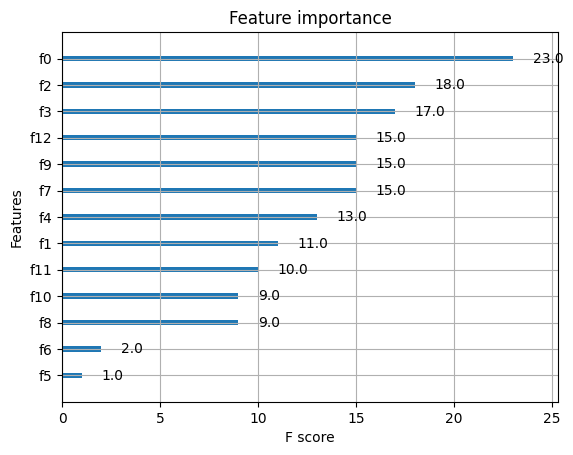

In [46]:
plot_importance(xgb)
plt.show()

In [47]:
result

,Model,Accuracy Score,Recall Score,F1 Score
0,Logistic Regression,0.836066,0.911765,0.861111
1,Naive Bayes,0.852459,0.911765,0.873239
2,Decision Tree,0.819672,0.794118,0.830769
3,Support Vector Machine,0.885246,0.941176,0.901408
4,Random Forest Classifier,0.885246,0.941176,0.901408
5,K-NN Classifier,0.901639,0.941176,0.914286
6,Extreme Gradient Boost,0.704918,1.000000,0.790698
7,Stacking CV Classifier,0.934426,0.911765,0.939394


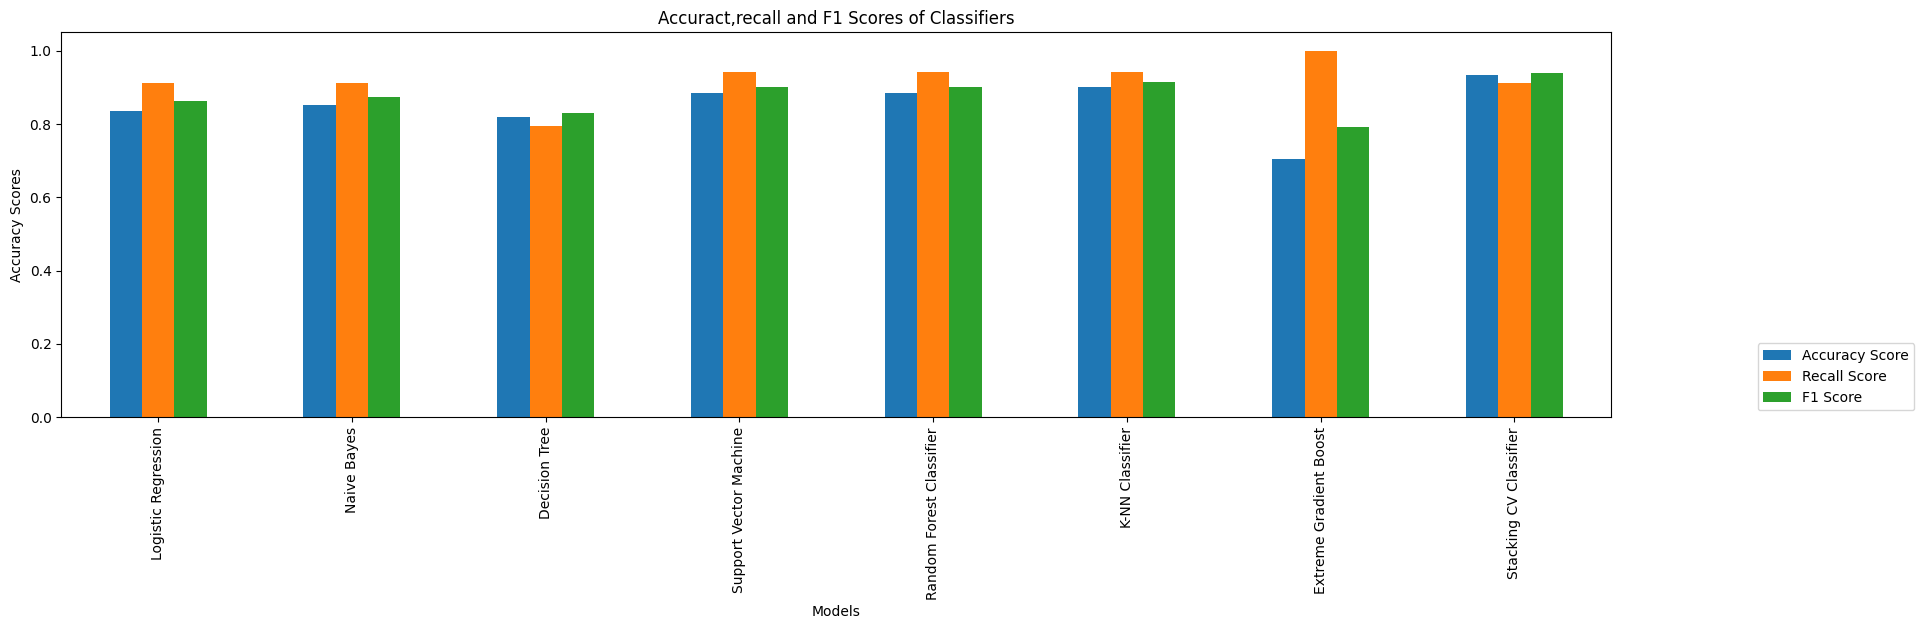

In [48]:
ax=result.plot(kind="bar",figsize=(20,5))
ax.set_xticks(result.index)
ax.set_xticklabels(result.Model,rotation=90)
plt.title('Accuract,recall and F1 Scores of Classifiers')
plt.xlabel('Models')
plt.ylabel('Accuracy Scores')
plt.legend(loc=4 , bbox_to_anchor=(1.2, 0))
plt.show();